In [19]:
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
import pandas as pd
import seaborn as sns

In [20]:
data = pd.read_csv('C:/Users/Rafae/Documents/Geral/Ufal/P8/ML/03_Validation/abalone_dataset.csv')

dummies = pd.get_dummies(data['sex'])

# rename the columns
dummies.columns = ['male', 'female', 'other']

# concatenate the new columns with the original DataFrame
data = pd.concat([data, dummies], axis=1)

# drop the original 'sex' column
data = data.drop('sex', axis=1)
data = data.drop('male', axis=1)
data = data.drop('female', axis=1)
data['type'] = data['type'].replace(3, 2)

<Axes: >

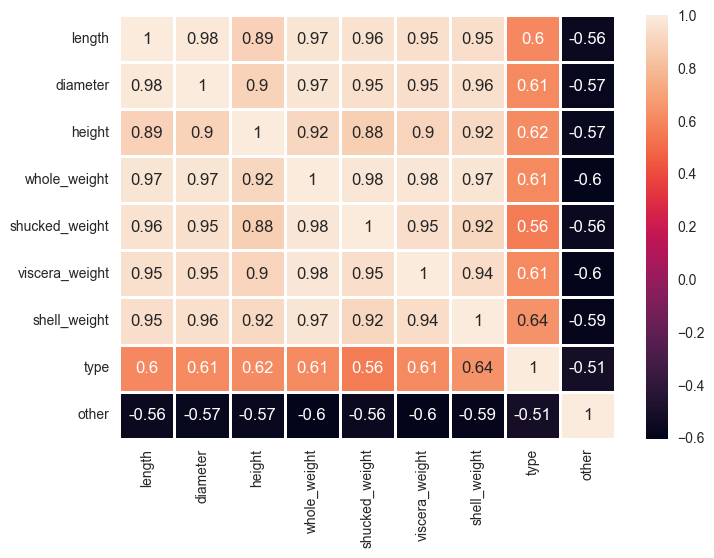

In [21]:
data_corr = data.corr(method='spearman')

correlation = data.corr()
sns.heatmap(data_corr, annot = True, linewidths = 1)

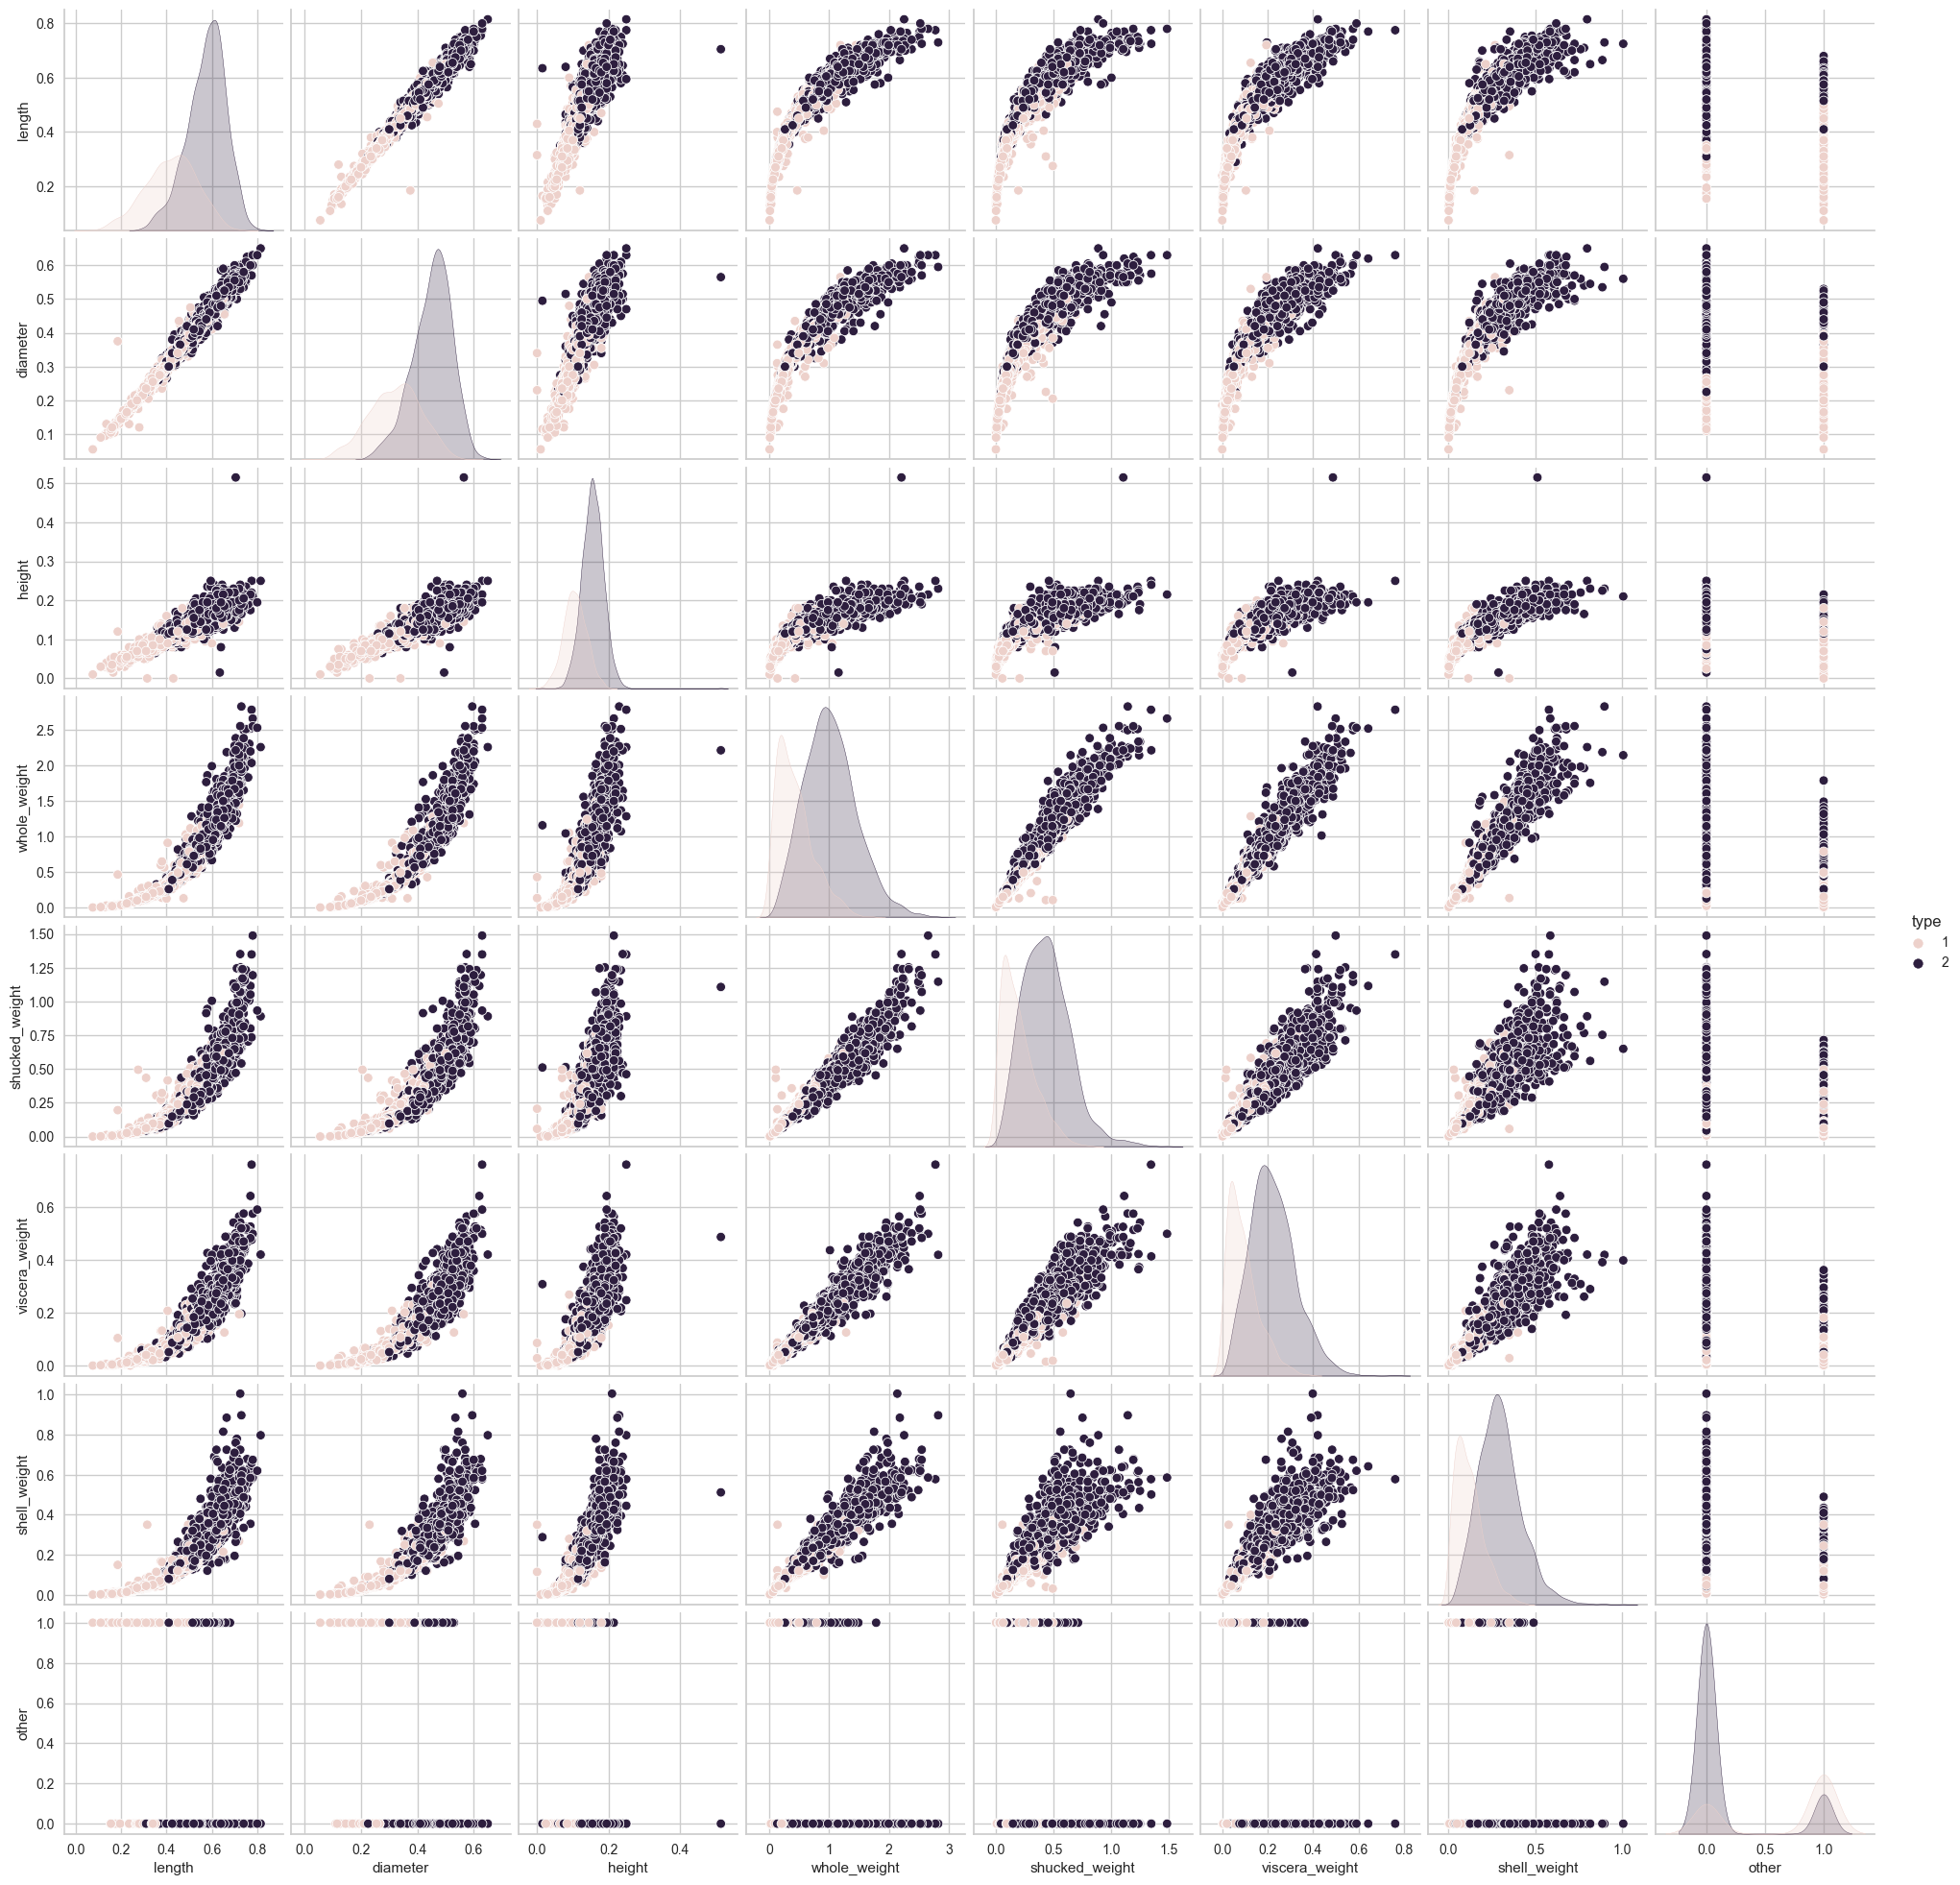

In [22]:
sns.pairplot(data, hue='type')

In [23]:
functional_api = setup(data, target = 'type', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(3132, 9)"
5,Transformed data shape,"(3132, 9)"
6,Transformed train set shape,"(2192, 9)"
7,Transformed test set shape,"(940, 9)"
8,Numeric features,8
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [24]:
oop_api  = ClassificationExperiment()
oop_api = oop_api.setup(data, target = 'type', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(3132, 9)"
5,Transformed data shape,"(3132, 9)"
6,Transformed train set shape,"(2192, 9)"
7,Transformed test set shape,"(940, 9)"
8,Numeric features,8
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce GTX 1080, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [25]:
# functional API
best_functional_api = functional_api.compare_models()


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:29:03
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8467,0.9013,0.9159,0.8604,0.8870,0.6495,0.6537,0.6650
gbc,Gradient Boosting Classifier,0.8453,0.9069,0.9144,0.8596,0.8860,0.6463,0.6502,0.4640
ada,Ada Boost Classifier,0.8440,0.8993,0.9040,0.8647,0.8837,0.6470,0.6494,0.4480
catboost,CatBoost Classifier,0.8417,0.9025,0.9103,0.8578,0.8830,0.6388,0.6427,0.4620
rf,Random Forest Classifier,0.8408,0.9020,0.9089,0.8577,0.8823,0.6369,0.6404,0.5880
ridge,Ridge Classifier,0.8403,0.0000,0.9033,0.8609,0.8814,0.6375,0.6400,0.3730
lda,Linear Discriminant Analysis,0.8371,0.8981,0.9033,0.8569,0.8793,0.6295,0.6323,0.4150
lr,Logistic Regression,0.8362,0.8971,0.8957,0.8609,0.8778,0.6299,0.6317,0.4540
xgboost,Extreme Gradient Boosting,0.8339,0.8864,0.8922,0.8606,0.8758,0.6254,0.6277,0.5930
svm,SVM - Linear Kernel,0.8312,0.0000,0.9013,0.8535,0.8749,0.6145,0.6244,0.3560


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [26]:
best_functional_api

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [27]:

# OOP API
best_oop_api = oop_api.compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [28]:
# functional API
functional_api.evaluate_model(best_functional_api)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [29]:

# OOP API
oop_api.evaluate_model(best_oop_api)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [30]:
oop_api.predict_model(best_oop_api)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8266,0.8867,0.8912,0.8512,0.8707,0.6078,0.6093


,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,other,type,prediction_label,prediction_score
2917,0.630,0.530,0.180,1.2795,0.6180,0.256,0.3150,0,1,2,0.95
2110,0.550,0.430,0.140,0.7135,0.2565,0.186,0.2250,0,1,2,0.85
1217,0.395,0.290,0.095,0.3040,0.1270,0.084,0.0770,1,0,1,0.93
1629,0.580,0.475,0.155,0.9740,0.4305,0.230,0.2850,0,1,2,0.89
1811,0.305,0.225,0.090,0.1465,0.0630,0.034,0.0415,1,0,1,0.98
...,...,...,...,...,...,...,...,...,...,...,...
2511,0.625,0.490,0.155,1.2085,0.4650,0.162,0.4110,0,1,2,0.93
23,0.290,0.210,0.060,0.1045,0.0415,0.022,0.0350,1,0,1,1.00
1855,0.450,0.355,0.115,0.4385,0.1840,0.108,0.1125,1,1,1,0.85
2874,0.660,0.510,0.175,1.2180,0.5055,0.303,0.3700,0,1,2,0.95


In [31]:
oop_api.save_model(best_oop_api, 'CatBoost_Classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Rafae\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['length', 'diameter', 'height',
                                              'whole_weight', 'shucked_weight',
                                              'viscera_weight', 'shell_weight',
                                              'other'...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_i